In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime 

In [2]:
inventory_df = pd.read_csv('C:/Users/20193723/Documents/Data Challenge 2/Data/inventory.csv')
products_df = pd.read_csv('C:/Users/20193723/Documents/Data Challenge 2/Data/products.csv')
promotions_df = pd.read_csv('C:/Users/20193723/Documents/Data Challenge 2/Data/promotions.csv')
transactions_df = pd.read_csv('C:/Users/20193723/Documents/Data Challenge 2/Data/transactions2.csv')

In [12]:
veg_prom_df = promotions_df[promotions_df['category'] == 'vegetable']
bread_prom_df = promotions_df[promotions_df['category'] == 'bread']

In [10]:
veg_prom_df.head()

,week,category,product_id,description,discount
0,1,vegetable,v_14,Biologische knoflook,30
1,1,vegetable,v_2,Courgette,5
2,1,vegetable,v_16,Biologische kikkererwten,10
3,1,vegetable,v_12,Biologische courgette,15
7,1,vegetable,v_15,Biologische pompoen,30


In [13]:
bread_prom_df.head()

,week,category,product_id,description,discount
4,1,bread,b_41,Chinois brioche,30
5,1,bread,b_40,Roomboter chocolade brood,25
6,1,bread,b_15,Vloerbrood volkoren,30
11,1,bread,b_34,Glutenvrij bruin,15
17,2,bread,b_29,Basic wit heel,15


In [15]:
bread_prom_df.groupby('product_id').count().head()

,week,category,description,discount
product_id,,,,
b_1,5,5,5,5
b_10,5,5,5,5
b_11,6,6,6,6
b_12,7,7,7,7
b_13,7,7,7,7


In [23]:
bread_prom_df.groupby(['product_id', 'discount']).count()

week  category  description
product_id discount                             
b_1        15           1         1            1
           20           1         1            1
           25           2         2            2
           35           1         1            1
b_10       10           2         2            2
           20           1         1            1
           30           2         2            2
b_11       5            3         3            3
           15           2         2            2
           35           1         1            1
b_12       5            2         2            2
           10           1         1            1
           20           2         2            2
           30           2         2            2
b_13       5            1         1            1
           10           1         1            1
           20           1         1            1
           30           1         1            1
           35           3         3            3
b_14       10           1         1            1
           15           1         1            1
           20           1         1            1
b_15       20           2         2            2
           25           1         1            1
           30           1         1            1
b_16       5            1         1            1
           15           1         1            1
           30           1         1            1
           35           1         1            1
b_17       10           1         1            1
...                   ...       ...          ...
b_38       5            1         1            1
           15           2         2            2
           20           1         1            1
           25           1         1            1
           30           2         2            2
b_39       10           1         1            1
           20           1         1            1
           35           1         1            1
b_4        10           3         3            3
           15           1         1            1
           20           1         1            1
           35           1         1            1
b_40       15           2         2            2
           25           2         2            2
b_41       15           1         1            1
           20           1         1            1
           30           1         1            1
b_5        10           2         2            2
           35           1         1            1
b_6        5            2         2            2
           15           1         1            1
           30           2         2            2
           35           1         1            1
b_8        5            1         1            1
           25           1         1            1
           30           1         1            1
           35           1         1            1
b_9        5            1         1            1
           10           2         2            2
           35           1         1            1

[136 rows x 3 columns]

In [46]:
veg_prom_df.groupby(['product_id', 'discount']).count()

week  category  description
product_id discount                             
v_1        10           1         1            1
           15           1         1            1
           20           1         1            1
           35           1         1            1
v_10       5            1         1            1
           10           1         1            1
           15           1         1            1
           25           1         1            1
v_11       5            1         1            1
           25           2         2            2
v_12       15           1         1            1
           25           2         2            2
           30           1         1            1
v_13       5            1         1            1
           15           3         3            3
           25           2         2            2
           30           1         1            1
v_14       5            1         1            1
           15           1         1            1
           25           1         1            1
           30           2         2            2
v_15       5            1         1            1
           10           3         3            3
           15           1         1            1
           25           1         1            1
           30           3         3            3
v_16       10           2         2            2
           20           1         1            1
v_17       10           1         1            1
           25           1         1            1
...                   ...       ...          ...
v_33       30           1         1            1
v_35       5            1         1            1
           15           1         1            1
           20           4         4            4
           35           1         1            1
v_4        5            1         1            1
           10           1         1            1
           15           1         1            1
           20           1         1            1
           30           2         2            2
v_5        5            1         1            1
           10           3         3            3
           25           1         1            1
v_6        15           3         3            3
           20           1         1            1
           25           1         1            1
           30           1         1            1
           35           2         2            2
v_7        5            1         1            1
           10           1         1            1
           15           1         1            1
           25           1         1            1
v_8        5            3         3            3
           30           3         3            3
           35           1         1            1
v_9        10           1         1            1
           15           3         3            3
           20           1         1            1
           25           2         2            2
           30           3         3            3

[121 rows x 3 columns]

In [47]:
grouped_bread = bread_prom_df.groupby(['product_id', 'discount']).count()

In [50]:
reindexed_grouped_bread = grouped_bread.reset_index()

In [55]:
reindexed_grouped_bread

product_id     136
discount       136
week           136
category       136
description    136
dtype: int64

In [167]:
def appendDateTime(df, column_name_date, column_name_time):
    '''
    Returns df with appended column containing date and time of the type datetime.
    Arguments:
        df <class 'dataframe'>: Target dataframe to append the column.
        column_name_date <type 'str'>: Column name of the column containing date of type str.
        column_name_date <type 'str'>: Column name of the column containing time of type str.
    Returns:
        df <class 'dataframe'>: df with appended column with date and time.
    '''

    def toDateTime(x):
        if not isinstance(x[1], float) and not isinstance(x[0], float):
            try: 
                return datetime.strptime(x[0] + ' ' + x[1], '%d-%m-%Y %H:%M:%S')
            except:
                return datetime.strptime(x[0] + ' ' +  x[1], '%d/%m/%Y %H:%M:%S')
    
    df['date_time'] = df[[column_name_date, column_name_time]].apply(lambda x: toDateTime(x), axis = 1)

    return df







def ProductPolynomialRegression(transactions_df, product_id: str, start_time = datetime(2018, 12, 30), end_time = datetime(2018, 1, 1)):
     
    import numpy
    from sklearn.metrics import r2_score
    """
    Fits a polynomial regression model to the price and sales data of the given product in the given time frame, 
    and returns this model, the R2 train score of the model, and a plot of the line through the datapoints.
    """
   
    #transactions_df = appendDateTime(transactions_df, 'day', 'time') #should be ran before to decrease time
    
    transaction_df = transactions_df[transactions_df['date_time'] >= start_time] #Removes transactions before the start time
    transaction_df = transactions_df[transactions_df['date_time'] <= end_time] #Removes transactions after the end time
    
    product_transactions = transactions_df[transactions_df['product_id'] == product_id] #removes transactions of different products
    prices = np.sort(product_transactions['purchase_price'].unique()) #creates sorted array of unique prices that the product is sold for
    prices = prices[~np.isnan(prices)] #Removes nan value from the price list
    
    sales = []
    for i in prices: 
        price_i_df = product_transactions[product_transactions['purchase_price'] == i] #Creates a temporary dataframe that only contains transactions of the product for price i in prices list
        sales.append(len(price_i_df)/len(price_i_df['date_time'].dt.normalize().unique())) #Adds average amount of sales per day for the price i to a list
    
    model = numpy.poly1d(numpy.polyfit(prices, sales, 2)) #Fits polynomial model of second degree to the prices and sales amount
    
    train_score = r2_score(sales, model(prices)) #Calculates how well the model fits the 
    
    myline = numpy.linspace(prices[0], prices[-1])

    plt.scatter(prices, sales)
    
    
    return model, train_score, plt.plot(myline, model(myline))
    

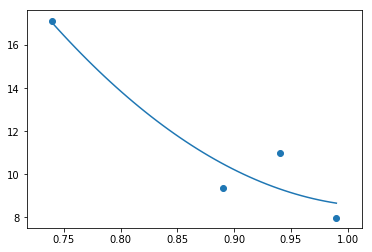

In [168]:
model, train_score, plot = ProductPolynomialRegression(transactions_df, 'v_5')

In [169]:
train_score

0.9071680637216054

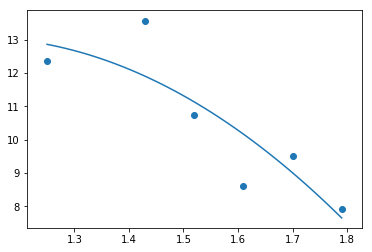

In [170]:
model2, train_score2, plot2 = ProductPolynomialRegression(transactions_df, 'v_4')

In [171]:
train_score2

0.7583773414121394

In [178]:
transactions_df.head()

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic,date_time
0,1/1/2018,9:07:00,0.0,NaN,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0,2018-01-01 09:07:00
1,1/1/2018,9:07:00,0.0,NaN,meat,m_16,Sappige gelders rookworst,250g,1.08,1.08,0.0,0.0,2018-01-01 09:07:00
2,1/1/2018,9:07:00,0.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,1.99,NaN,0.0,2018-01-01 09:07:00
3,1/1/2018,9:07:00,0.0,NaN,meat,m_6,Half om half gehakt,500g,2.69,2.42,0.0,0.0,2018-01-01 09:07:00
4,1/1/2018,9:07:00,0.0,NaN,bread,b_33,Biologisch bruin heel,1st,2.12,2.12,1.0,0.0,2018-01-01 09:07:00


In [ ]:
transactions_df['weekday'] = 200
for i in range(len(transactions_df)):
    transactions_df['weekday'][i] = transactions_df['date_time'][i].weekday()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
